In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_test.shape

(10000,)

In [7]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
x_train = x_train/255
x_test = x_test/255

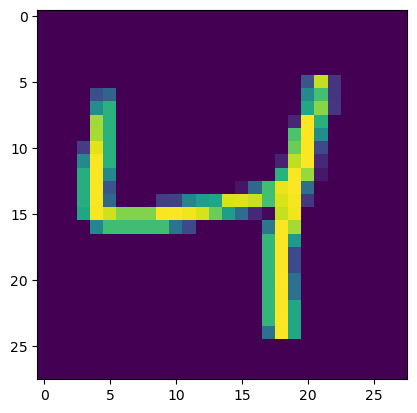

In [10]:
plt.imshow(x_train[2])

In [11]:
labels = ['0','1','2','3','4','5','6','7','8','9']

In [12]:
def plot_sample(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(labels[y[index]])

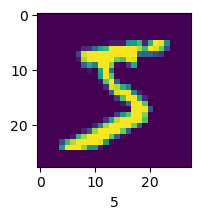

In [13]:
plot_sample(x_train, y_train, 0)

In [19]:
cnn = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
cnn.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 1.2885 - accuracy: 0.5810
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1687 - accuracy: 0.9500
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1094 - accuracy: 0.9660
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0865 - accuracy: 0.9735
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0736 - accuracy: 0.9773


In [23]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 6.3573 - accuracy: 0.9801


[6.35730504989624, 0.9800999760627747]

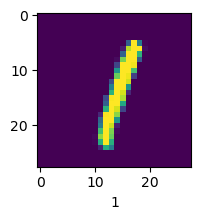

In [24]:
plot_sample(x_test, y_test, 5)

In [ ]:
y_pred = cnn.predict(x)